In [1]:
# from net3d_v9_4_2 import *
# from net3d_v9_4_3 import *
from net3d_v9_4_4 import *

In [2]:
%matplotlib inline
from matplotlib.pyplot import *
#%pylab inline
%config InlineBackend.figure_format = 'retina'


In [3]:
import igraph as ig

In [4]:
n, m = 50,3
g = ig.Graph.Barabasi(n = n, m=m)

In [5]:
g.vcount(),g.ecount()

(50, 144)

In [8]:
edg = array(g.get_edgelist())

In [9]:
pts = random.randn(n,3)

In [10]:
nn = netRads(pts,edg, A=1.,k=.1)
nn.params['nodes']['radius'] = 1. 

dt(s) = 0.832


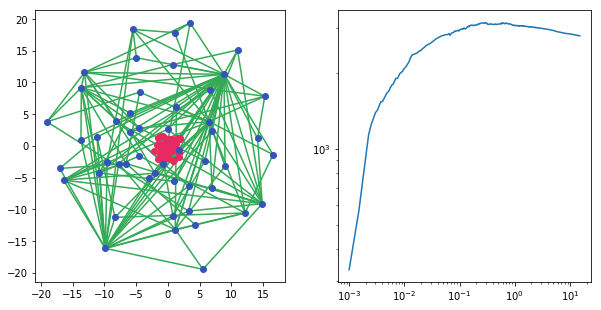

Beginning convergence check ...
dt(s) = 0.616


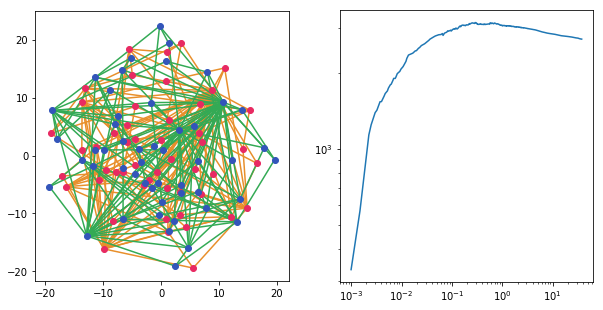

2000) ct=0.13, Has Not Converged! d<l>/dlog(t)~0.653
dt(s) = 0.616


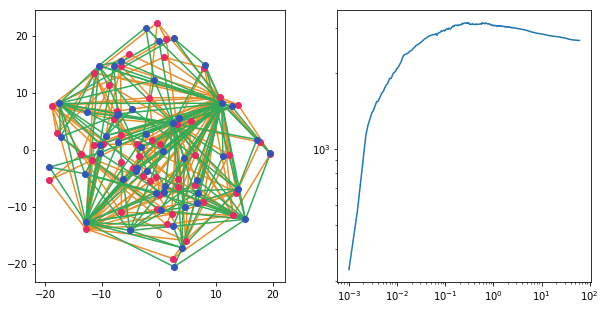

3000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.44
dt(s) = 0.615


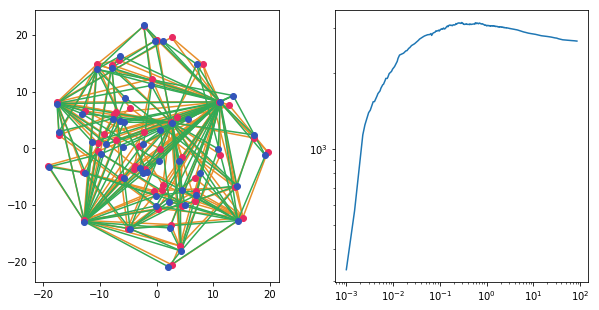

4000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.307
dt(s) = 0.61


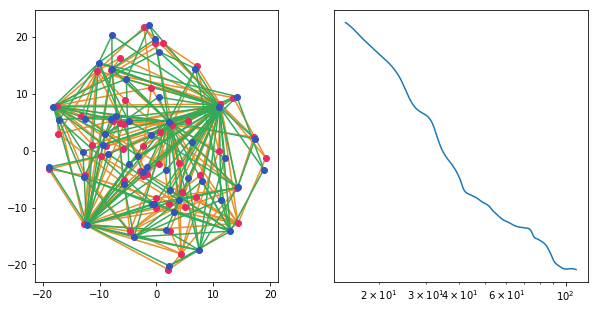

5000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.331
dt(s) = 0.62


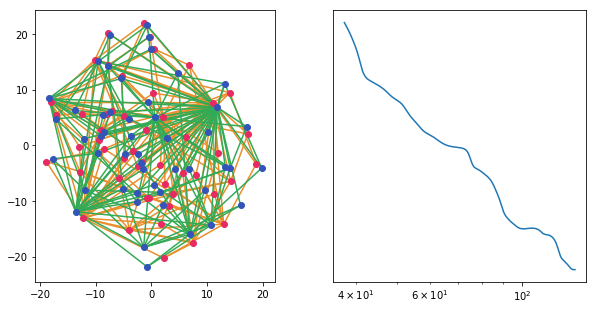

6000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.396
dt(s) = 0.625


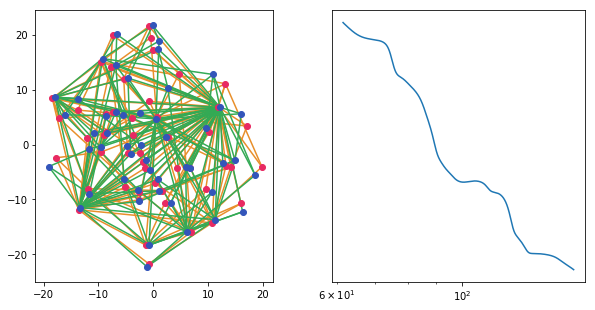

7000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.116
dt(s) = 0.645


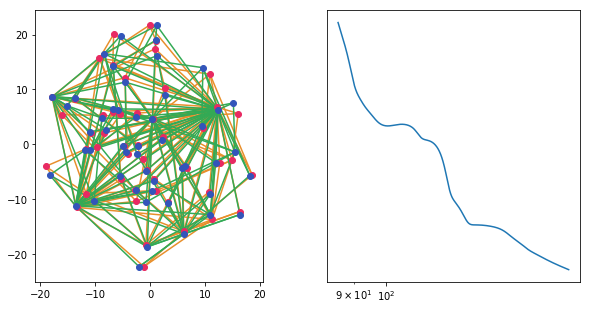

8000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.13
dt(s) = 0.63


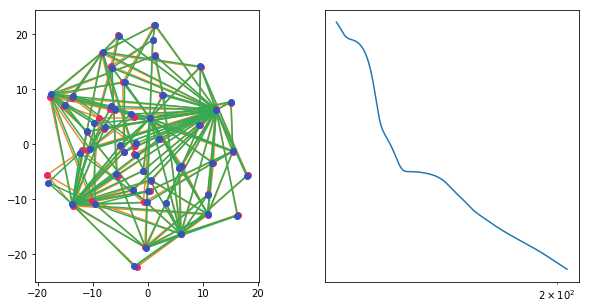

9000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.12
dt(s) = 0.622


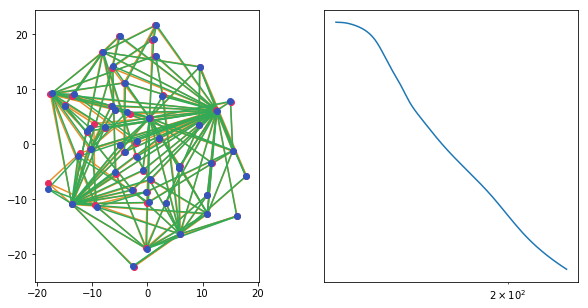

10000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.0904
dt(s) = 0.621


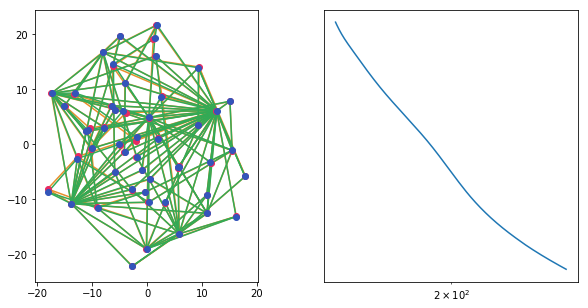

11000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.0597
dt(s) = 0.63


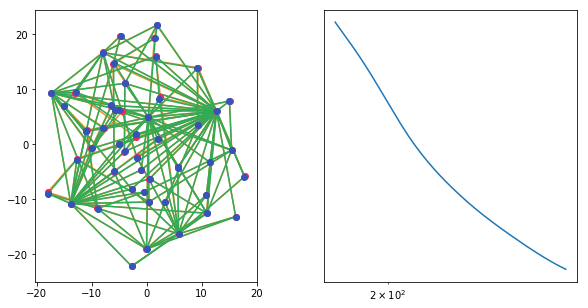

12000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.0468
dt(s) = 0.622


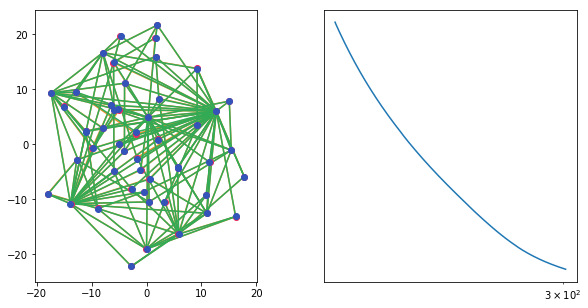

13000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.0257
dt(s) = 0.62


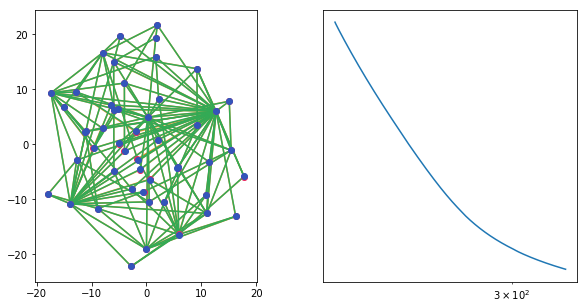

14000) ct=0.12, Has Not Converged! d<l>/dlog(t)~0.0136
dt(s) = 0.627


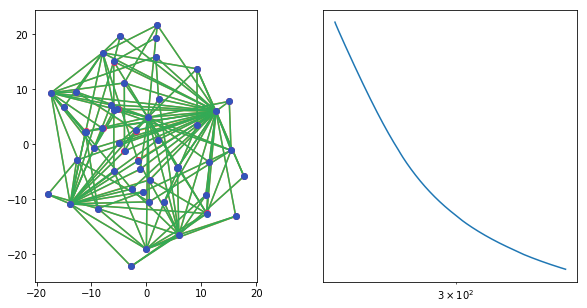

15000) ct=0.12, Converged! d<l>/dlog(t)~0.00874


In [11]:
ep = .01
iter_converge(nn,tol=1*ep, tv = -4000, eps=ep)

In [36]:
lab = lambda k: ';'.join([str(i) for i in k])
net = {'scale':1 ,'info':nn.params, 'nodes':{'positions':nn.pts.tolist(),'labels':range(len(nn.pts))},
      'links':{}}
net['info']['nodes'].update({'labels':range(len(nn.pts))})

for k in edg:
    net['links'][lab(k)]={
         u'end_points':k.tolist(),
         u'points':float16(nn.pts[k]).tolist(),
         u'radius':1.,
         u'weight':1.}

In [38]:
mkdir ../../output/phase-100217/

In [40]:
ii = 0
json.dump(net,open('../../output/phase-100217/BA-%d-n%d-L%d.json'%(ii,n, nn.elist.shape[0]),'w'))

In [26]:
net['links'].items()[0][1].keys()

[u'end_points', u'points', u'radius', u'weight']

In [13]:
net = json.load(open('../../output/diseasome/weighted-diseasome-betw-asinh+2-n516-L1188-th-r4.88-segs30-ka0.1-it101427.json','r'))

In [14]:
net.keys()

[u'info', u'scale', u'name', u'links', u'edgelist', u'nodes']

In [22]:
net['info']['nodes'].keys()
net['nodes'].keys()

[u'positions', u'labels']

In [3]:
fnam = '../../output/phase-100217/BA-0-n50-L144.json'

#rad = 1./.7
xi = .05#.7 #1.#weighted_edg[:,2].mean()**2
fx = 0
k,A = .1,1.*xi
nn2 = networkBase(
                  JSON=fnam,
                  keep_paths=1,
                 fixed = fx, 
                 links = {'Temp0':.0, 'ce': 10.,
                          'thickness':xi,'segs':30, 'k':k,#/xi,
                          'amplitude':1e1*A,
                         'max_workers':50, 'weighted':0}, 
                 nodes={#'radius':rad, #10*xi, 
                        'weighted':0,
                        'amplitude':A,
                        #'labels':nodes,
                       }) # 50/xi
n,m = nn2.pts.shape[0], nn2.elist.shape[0]
#nn2.it_num = int(fnam.split('-it')[1][:-5])

# nn2.gnam = 'weighted-flavor-lin-n%d-L%d-th-r%.3g-segs%d-ka%.3g' %(n,m,
nn2.gnam = fnam.split('/')[-1].split('-n')[0]+'-n%d-L%d-th-r%.3g-segs%d-ka%.3g' %(n,m,
            nn2.links.thickness.mean()/nn2.nodes.radius,nn2.links.segs,k/A)\
        +('-fixed' if fx else '')
nn2.gnam0 = nn2.gnam +''
nn2.gnam

dt(s) = 0.186
Making links... single thickness? Adapting to edge segments...
single k? Adapting to edge segments...
making 50 workers for external force calculations...
dt(s) = 4.48
Making nodes... dt(s) = 0.871
initializing global variables... dt(s) = 0.607
Initial binning...
^10 0 v5 62 v10 111 0 |0.01 dt(s) = 0.154
setup: dt... dt(s) = 0.0056
setup: volume... dt(s) = 0.00498
setup: dynamics... dt(s) = 0.000712
setup: dynamics 2... dt(s) = 0.00106
Done!

'BA-0-n50-L144-th-r0.05-segs30-ka2'

In [5]:
nn2.dt.eval()

9.9999997e-06

step:  0 )
4050 4200 4350 4500 4650 4800 4950 dt(s) = 66.4


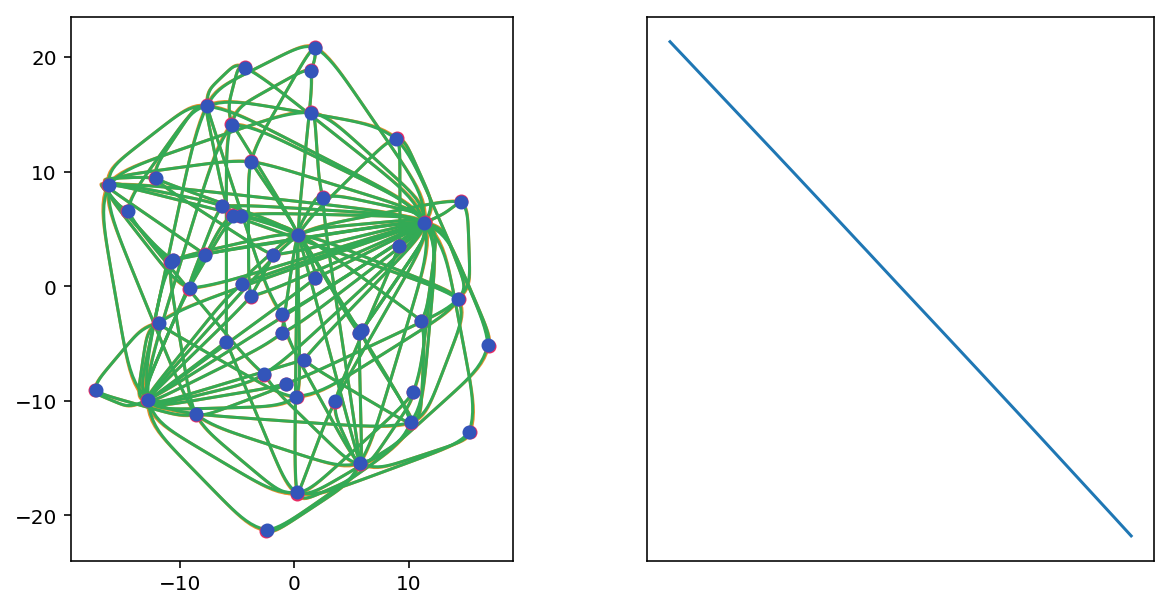

Beginning convergence check ...
5100 5250 5400 5550 5700 5850 dt(s) = 65.6


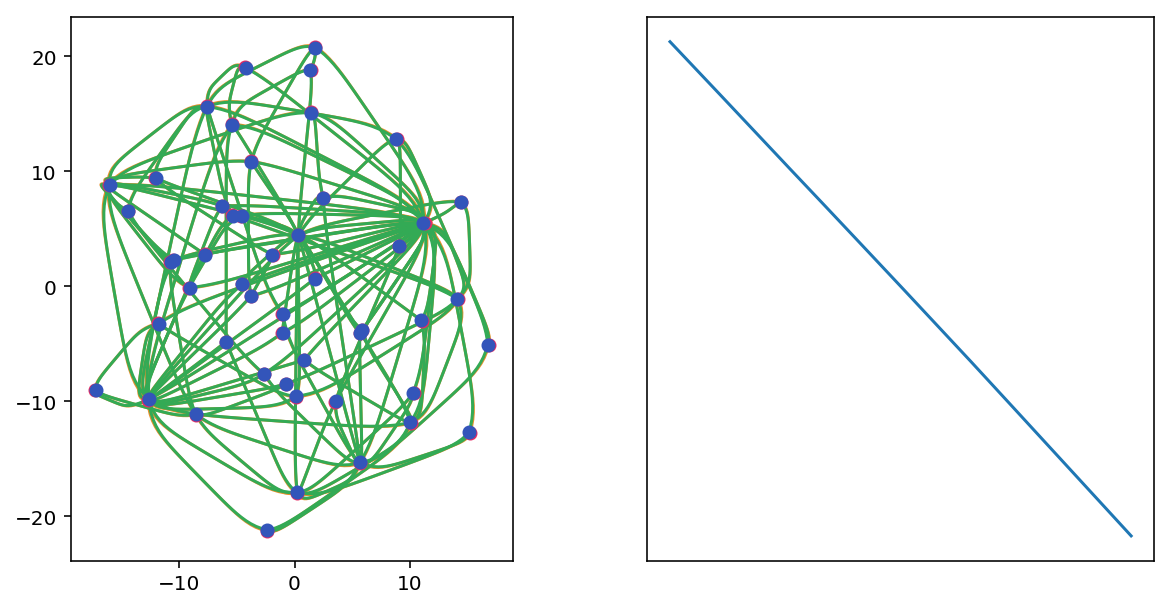

6000) ct=1.3, Has Not Converged! d<l>/dlog(t)~0.48
6000 6150 6300 6450 6600 6750 6900 dt(s) = 66


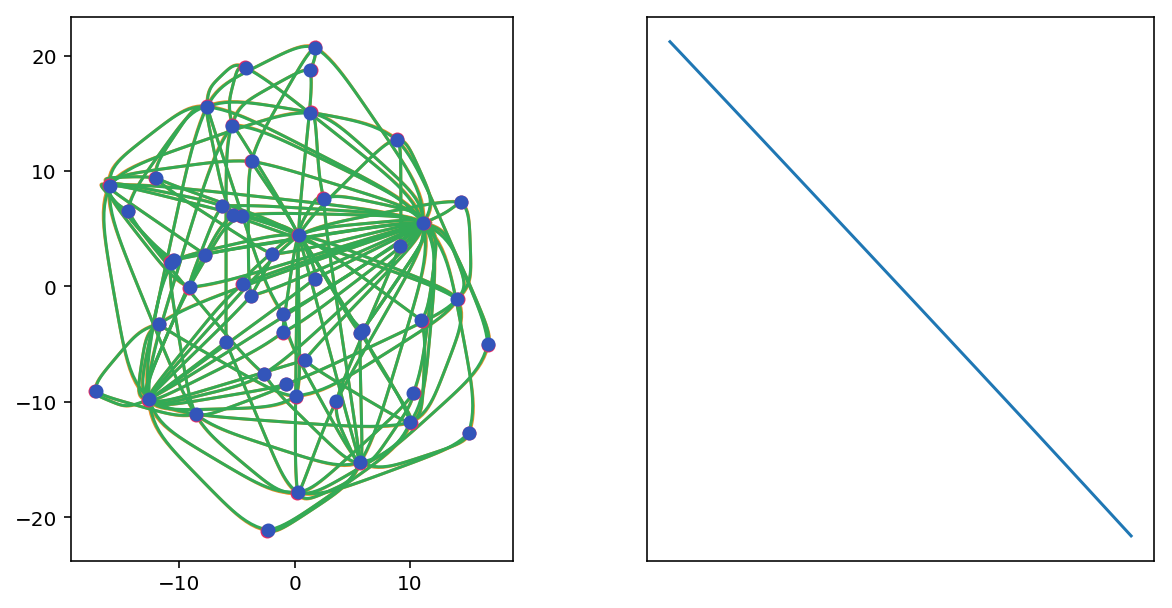

7000) ct=1.3, Has Not Converged! d<l>/dlog(t)~0.514
7050 7200

KeyboardInterrupt: 

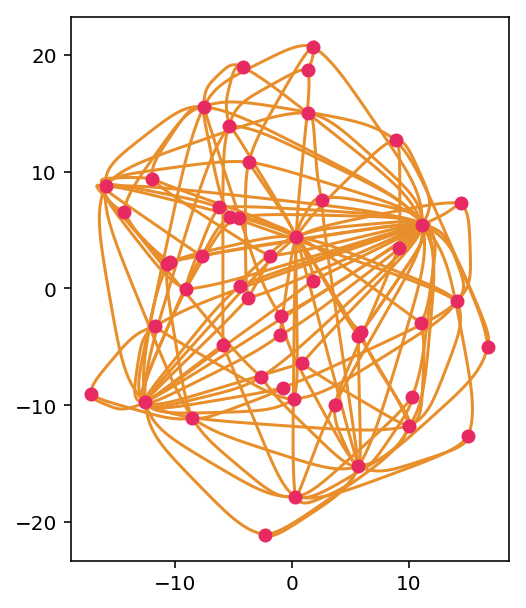

In [6]:
nn2.degrees = nn2.nodes.degrees +0.

ep = 0.5
for i in range(2):
    print 'step: ',i,')'
    iter_converge(nn2,its = 1000,draw=1, max_its=20200, tol=.1*ep, tv = -400, 
                  save_path= '../../output/phase-100217/',
                  eps = ep, rebin=150)
    nn2.gnam = nn2.gnam0 + '-it%d'%(nn2.it_num)
    nn2.save('../../output/phase-100217/', tv=0)


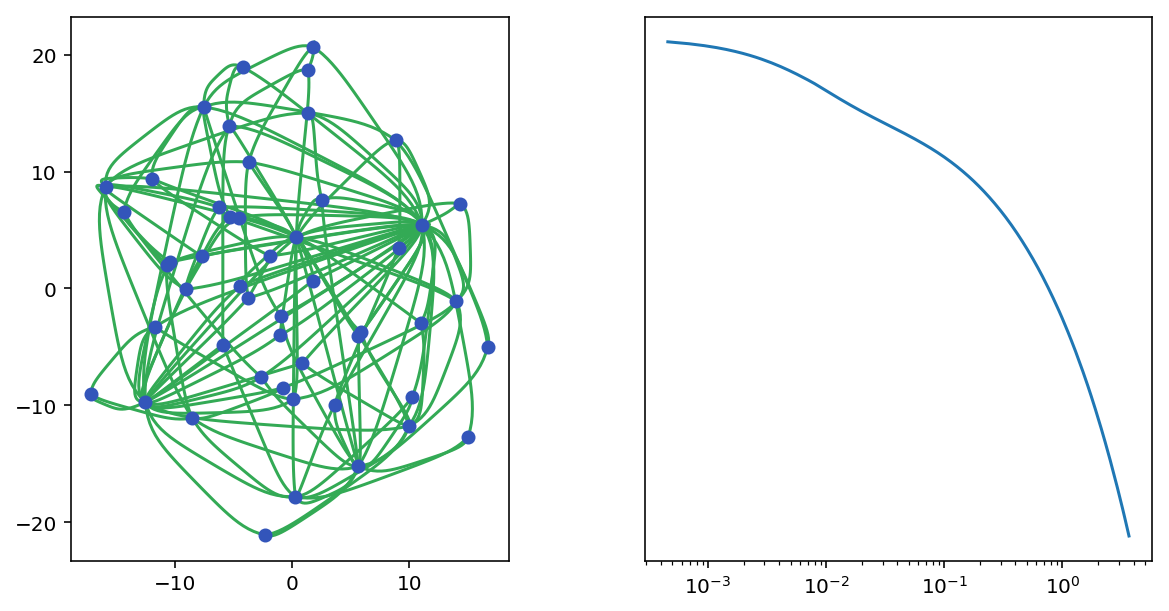

In [7]:
draw_net_tv(nn2)

In [7]:
from matplotlib.mlab import movavg

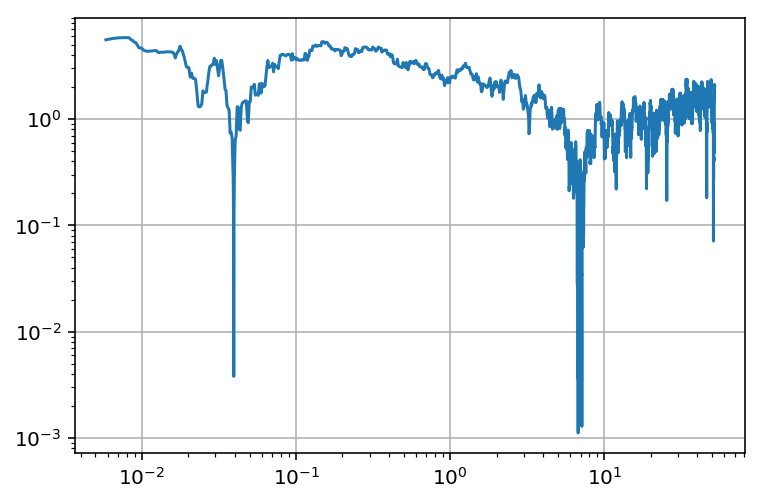

In [15]:
n = nn2.pts.shape[0]
g0 = gradient(nn2.tv[:])[0].T
g1 = g0[1]/g0[0]
l = nn2.elist.shape [0]

t,v = array(nn2.tv)[:].T
w = 1000
plot(movavg(t,w),abs(movavg(arcsinh(g1*t/l),w)))
xscale('log')
yscale('log')
grid(1)

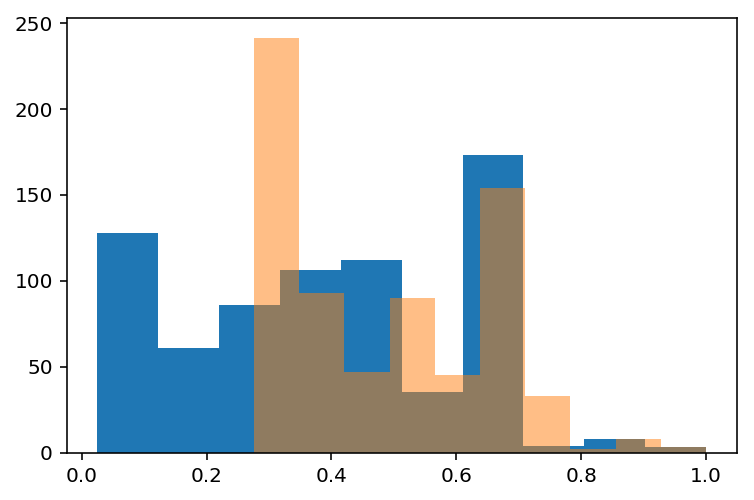

In [25]:
f = lambda x,a,b : maximum(a*x.max(), x)**b
h= hist(nn2.link_weights/nn2.link_weights.max())
h= hist(f(nn2.link_weights/nn2.link_weights.max(), .2, .8), alpha = .5)

In [7]:
nn2.netJSON.keys()

['info', 'scale', 'name', 'links', 'edgelist', 'nodes']

In [18]:
nn2.netJSON['info']['info']

{u'links': {u'Temp0': 0.0,
  u'amplitude': 1000.0,
  u'ce': 10.0,
  u'k': 0.1,
  u'labels': [u'bitter_orange; strawberry',
   u'black_tea; okra',
   u'cheddar_cheese; sheep_cheese',
   u'melon; nectarine',
   u'juniper_berry; raspberry',
   u'parmesan_cheese; rum',
   u'kiwi; strawberry',
   u'pork_liver; roasted_peanut',
   u'blueberry; cranberry',
   u'gardenia; orange_flower',
   u'beef; pork_sausage',
   u'bartlett_pear; pear',
   u'cayenne; green_bell_pepper',
   u'port_wine; red_wine',
   u'black_bean; lima_bean',
   u'red_bean; red_kidney_bean',
   u'beer; coffee',
   u'cayenne; tabasco_pepper',
   u'beer; cheddar_cheese',
   u'blackberry; blueberry',
   u'romano_cheese; swiss_cheese',
   u'guava; strawberry',
   u'apple; pineapple',
   u'butter; roasted_beef',
   u'blue_cheese; rum',
   u'blueberry; strawberry',
   u'beer; hop',
   u'flower; jasmine',
   u'apple; concord_grape',
   u'green_tea; lemon_peel',
   u'munster_cheese; provolone_cheese',
   u'apple; cider',
   u'peanut

In [8]:
nn2.netJSON['nodes'].keys()

['positions', 'labels']

In [21]:
net_mod = {}
net_mod.update(nn2.netJSON)

In [22]:
nl = net_mod['links']
th = array([nl[k]['radius'] for k in sorted(nl)])
th_max = th.max()


In [23]:
a,b = 0.3, 0.8
th1 = []
for k in net_mod['links']:
    x = net_mod['links'][k]['radius'] 
    r = maximum(a*th_max, x )**b
    net_mod['links'][k]['radius'] = r
    th1 += [r]
    
th1 = array(th1)

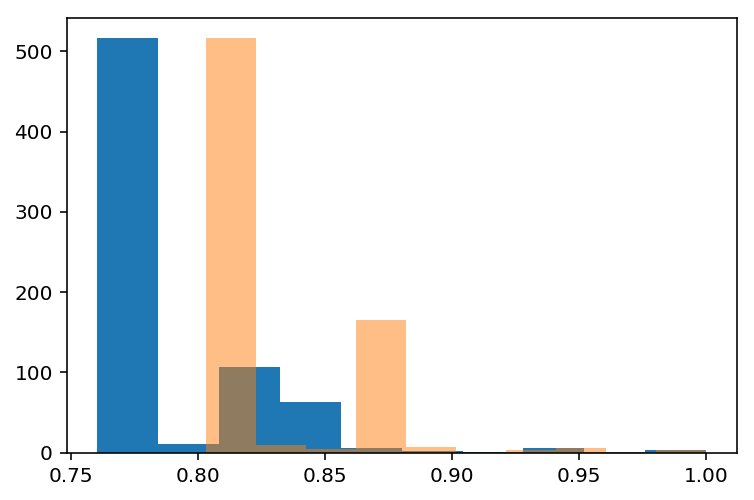

In [24]:
h = hist(th/th_max)
h = hist(th1/th1.max(), alpha = .5)


In [13]:
json.dump(net_mod,open('../output/flavor/'+nn2.gnam.replace('-lin' ,'-mod(%.2g,%.2g)'%(a,b))+'.json', 'w'))